In [2]:
# Import necessary libraries
import h2o
from h2o.automl import H2OAutoML
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Initialize H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,21 hours 6 mins
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 21 days
H2O_cluster_name:,H2O_from_python_ajith_81q6xc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.764 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [3]:
# Load the dataset
hourly_data = h2o.import_file("D:\Wk13_14_Graded Assignment\data\hour.csv")
daily_data = h2o.import_file("D:\Wk13_14_Graded Assignment\data\day.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [5]:
# Task 1: Explore the dataset
# Display basic statistics, check for missing values, and visualize the data distribution
hourly_data.describe()
daily_data.describe()


Rows:17379
Cols:17

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
type,int,time,int,int,int,int,int,int,int,int,real,real,real,real,int,int,int
mins,1.0,1293840000000.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.02,0.0,0.0,0.0,0.0,0.0,1.0
mean,8690.0,1325477314552.0461,2.501639910236492,0.5025605615973301,6.5377754761493785,11.546751826917548,0.028770355026181024,3.003682605443351,0.6827205247712756,1.425283387997008,0.4969871684216584,0.47577510213476026,0.6272288394038784,0.1900976063064618,35.67621842453536,153.78686920996606,189.4630876345014
maxs,17379.0,1356912000000.0,4.0,1.0,12.0,23.0,1.0,6.0,1.0,4.0,1.0,1.0,1.0,0.8507,367.0,886.0,977.0
sigma,5017.029499614288,18150225217.779854,1.1069181394480765,0.5000078290910197,3.438775713750168,6.914405095264493,0.16716527638437123,2.005771456110988,0.4654306335238829,0.6393568777542534,0.19255612124972193,0.17185021563535932,0.19292983406291514,0.1223402285727905,49.30503038705309,151.35728591258314,181.38759909186476
zeros,0,0,0,8645,0,726,16879,2502,5514,0,0,2,22,2180,1581,24,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,2011-01-01 00:00:00,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01 00:00:00,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,8.0,32.0,40.0
2,3.0,2011-01-01 00:00:00,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.8,0.0,5.0,27.0,32.0


Rows:731
Cols:16

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
type,int,time,int,int,int,int,int,int,int,real,real,real,real,int,int,int
mins,1.0,1293840000000.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0591304,0.0790696,0.0,0.0223917,2.0,20.0,22.0
mean,366.0,1325376000000.0,2.4965800273597845,0.5006839945280438,6.519835841313272,0.028727770177838577,2.997264021887825,0.6839945280437757,1.3953488372093026,0.4953847885088925,0.47435398864569056,0.6278940629274968,0.19048621162790708,848.1764705882346,3656.172366621066,4504.348837209304
maxs,731.0,1356912000000.0,4.0,1.0,12.0,1.0,6.0,1.0,3.0,0.861667,0.840896,0.9725,0.507463,3410.0,6946.0,8714.0
sigma,211.16581162678773,18244726124.554462,1.1108070927726252,0.5003418803818265,3.451912787256252,0.16715474262247382,2.004786917944481,0.46523338667770364,0.5448943419593665,0.18305099611148876,0.1629611783863112,0.142429095138354,0.07749787068166944,686.6224882846551,1560.2563770194536,1937.2114516187676
zeros,0,0,0,365,0,710,105,231,0,0,0,1,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,2011-01-01 00:00:00,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,985.0
1,2.0,2011-01-02 00:00:00,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,801.0
2,3.0,2011-01-03 00:00:00,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,1349.0


In [45]:
# Split Day data into training and testing sets
day_train, day_test = daily_data.split_frame(ratios=[0.8], seed=1234)

In [46]:
# Task 2a: Build AutoML model for hourly data
aml_hourly = H2OAutoML(max_models=10, seed=1234)
x = hourly_data.columns
y = "cnt"

In [47]:
# Task 2b: Build AutoML model for daily data
aml_daily = H2OAutoML(max_models=10, seed=1234)
x_daily = daily_data.columns
y_daily = "cnt"

In [48]:
aml_daily.train(x=x_daily, y=y_daily, training_frame=daily_data)

AutoML progress: |█
16:49:52.617: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/10
# GBM base models (used / total),4/6
# DRF base models (used / total),0/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [49]:
# Task 2c: Build Gradient Boosting model for daily data
from h2o.estimators import H2OGradientBoostingEstimator

gbm_daily = H2OGradientBoostingEstimator()
gbm_daily.train(x=x_daily, y=y_daily, training_frame=daily_data)

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1707496084978_33


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          18397                  5            5            5             11            31            24.54

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 2550.385311412207
RMSE: 50.50133969918231
MAE: 33.77167628923617
RMSLE: 0.11168416766584044
Mean Residual Deviance: 2550.385311412207

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------  -----------------  ------------------  ------------------  -------------------
     2024-02-11 16:52:07  0.009 sec   0.0                1935.8859561152221  1581.7927019374538  3747654.435084148
     2024-02-11 16:52:07  0.018 sec   1.0                1746.6313204112223  1427.0751552346956  3050720.96944145
     2024-02-11 16:52:07  0.023 sec   2.0                1576.4880093702488  1287.6427601450282  2485314.44368817
     2024-02-11 16:52:07  0.028 sec   3.0                1422.5165184102884  1162.0496206635817  2023553.2451501286
     2024-02-11 16:52:07  0.032 sec   4.0                1283.635822390167   1047.6774952441006  1647720.9245232805
     2024-02-11 16:52:07  0.035 sec   5.0                1158.9267044553458  945.8873640026504   1343111.1062997282
     2024-02-11 16:52:08  0.043 sec   6.0                1046.672263893427   853.5597423130771   1095522.8280037916
     2024-02-11 16:52:08  0.047 sec   7.0                944.9916317023831   770.1586897363414   893009.1839875324
     2024-02-11 16:52:08  0.050 sec   8.0                853.0354145979742   694.6843255039116   727669.4185583377
     2024-02-11 16:52:08  0.053 sec   9.0                770.6564340330656   626.7321503478753   593911.3393165608
---  ---                  ---         ---                ---                 ---                 ---
     2024-02-11 16:52:08  0.154 sec   41.0               62.05508603617028   41.44068309611726   3850.833702956496
     2024-02-11 16:52:08  0.160 sec   42.0               60.03951008686062   40.00532684117433   3604.742771470239
     2024-02-11 16:52:08  0.162 sec   43.0               58.17548617455046   38.7010125657276    3384.3871916453118
     2024-02-11 16:52:08  0.165 sec   44.0               56.60387337374927   37.689695345230206  3203.9984809114417
     2024-02-11 16:52:08  0.167 sec   45.0               55.31470704418153   36.897962578018124  3059.716815383626
     2024-02-11 16:52:08  0.170 sec   46.0               54.127405448287995  36.006515565551254  2929.7760205633567
     2024-02-11 16:52:08  0.171 sec   47.0               53.11960808007407   35.4606774952441    2821.692762580671
     2024-02-11 16:52:08  0.176 sec   48.0               52.11276637390608   34.84440093033943   2715.740419141316
     2024-02-11 16:52:08  0.178 sec   49.0               51.29841623438183   34.33637342961803   2631.52750815589
     2024-02-11 16:52:08  0.181 sec   50.0               50.50133969918231   33.77167628923617   2550.385311412207
[51 rows x 7 columns]


Variable Importances: 
variable    relative_importance    scaled_importance    percentage
----------  ---------------------  -------------------  ------------
registered  1.29357e+10            1                    0.897767
casual      1.45014e+09            0.112103             0.100643
instant     9.4516e+06             0.000730658          0.000655961
dteday      5.13179e+06            0.000396714          0.000356157
yr          4.80497e+06            0.000371449          0.000333475
temp        883531    

In [50]:
print(varimp.head())

               GLM_1  DeepLearning_1  GBM_grid_1_model_1     GBM_1     GBM_2  \
registered  0.152088        0.092171            0.256550  0.725952  0.741701   
casual      0.108223        0.071887            0.195192  0.195287  0.106630   
dteday      0.101148        0.069692            0.115772  0.020607  0.096613   
atemp       0.101508        0.078690            0.050557  0.001683  0.003707   
yr          0.091156        0.060167            0.040341  0.000020  0.000033   

                   GBM_5     GBM_4     XRT_1     GBM_3     DRF_1  
registered  7.048915e-01  0.704503  0.465293  0.527396  0.447355  
casual      1.352182e-01  0.158099  0.137793  0.190427  0.109271  
dteday      5.141907e-02  0.010404  0.078513  0.093760  0.143074  
atemp       5.615996e-03  0.003650  0.040595  0.011556  0.040383  
yr          5.108052e-07  0.000574  0.001155  0.002268  0.023480  


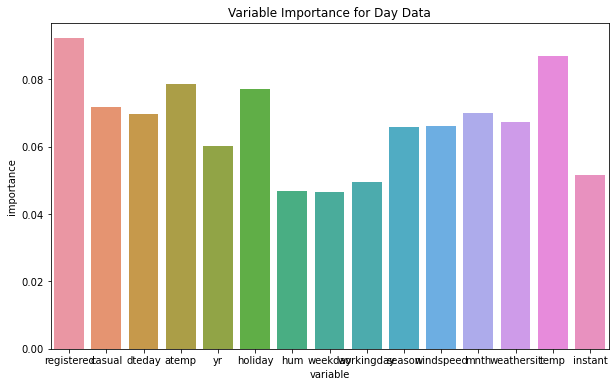

In [51]:
import pandas as pd

# Create a new dataframe with the correct column names
new_df = pd.DataFrame(columns=['variable', 'importance'])

# Assign the varimp data to the importance column
new_df['importance'] = varimp.iloc[:, 1]

# Set the variable names as the index of the new dataframe
new_df['variable'] = varimp.index

# Reset the index of the new dataframe
new_df = new_df.reset_index(drop=True)

# Plot the variable importance
plt.figure(figsize=(10, 6))
sns.barplot(x="variable", y="importance", data=new_df)
plt.title("Variable Importance for Day Data")
plt.show()

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from eli5.sklearn import PermutationImportance

# Assuming X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor instance
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Create a PermutationImportance instance
perm = PermutationImportance(model, random_state=42)

# Get feature importances
feature_importances = perm.fit(X_train, y_train)

# Print feature importances
print(feature_importances)

PermutationImportance(estimator=RandomForestRegressor(random_state=42),
                      random_state=42)


In [65]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [66]:
from eli5.sklearn import PermutationImportance

# Create a PermutationImportance instance
perm = PermutationImportance(model, random_state=42)

# Get feature importances
feature_importances = perm.fit(X_train, y_train)

# Print feature importances
print(feature_importances)

PermutationImportance(estimator=RandomForestRegressor(random_state=42),
                      random_state=42)


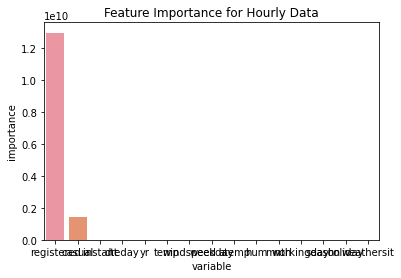

In [70]:
import pandas as pd

# Assuming feat_imp is a list of tuples
feat_imp_df = pd.DataFrame([(feat, imp) for feat, imp, _, _ in feat_imp], columns=['variable', 'importance'])

# Now you can use the DataFrame in the barplot function
sns.barplot(x="variable", y="importance", data=feat_imp_df)
plt.title("Feature Importance for Hourly Data")
plt.show()
